## Project 4 - Numerical Integration

## Introduction

### Project Structure

In [1]:
%ls ..

MATH3316-Project3.xcodeproj/ lib/
bin/                         res/
doc/                         src/


Excluding the `.xcodeproj` file, which was used for integration with the Xcode IDE, debugging, and profiling purposes, each item in the project directory serves the following purpose:

- `Makefile`: GNU Make project build automation definitions.
- `bin/`: compiled binaries. Make will put binaries here by default.
- `doc/`: directory containing all documentation, including this report.
- `lib/`: reused libraries that are not part of this project specifically. Contains a rewrite of the Matrix library ([phrz/matrix](https://github.com/phrz/matrix)).
- `res/`: where calculated data is stored after program execution. Files are `.txt` files containing real numbers, space delimited to denote row items, and newline delimited to denote new rows. For this project, the `.txt` files are also organized into separate `res/part{1..3}/` directories.
- `src/`: contains the C++ implementations of the calculations described in this report.

### Using this Project

#### Prerequisites
- A Unix or Unix-like OS (e.g. macOS or Linux)
- A compiler with support for C++14 (LLVM or GNU toolchain)
- Python ≥3.5
- The latest Jupyter distribution
    - matplotlib
- LaTeX with `pdflatex`
- GNU Make ≥3.81

#### Building this project

`make all` (default) - will compile binaries, execute them to generate data files, execute Jupyter notebooks with new data files, and convert them to PDFs in `res/reports/`.

`make all_bin` - will compile binaries for part 1 and 2 of this project.

`make all_data` - will compile binaries and execute them to generate data files.

`make clean` - will delete all compiled binaries, generated data, executed notebook copies (but not the original notebooks), and report PDFs.

## Part 1 - Trapezoidal Rule and Simpson's Rule

This portion of the project involves approximating the definite integral of a polynomial function and a trigonometric function using both the composite trapezoidal rule and the composite Simpson's rule.

### Background

#### Composite Trapezoidal Rule

One method for finding the area under a curve $y = f(x)$ over the interval $[a,b]$ is by approximating the area using a series of trapezoids over the intervals $\{[x_k,x_{k+1}]\}$.

Let the interval $[a,b]$ be divided into $n$ subintervals $[x_k,x_{k+1}]$ of width $h = (b - a)\ /\ n$ using the equally spaced nodes $x_k = a + k h\ ,\ k = 0, 1,\ ...\ n$. The composite trapezoidal rule can then be expressed as

$$
T(\ f) = \frac{h}{2} (\ f_0 + 2\ f_1 +\ ...\ + 2\ f_{n-1} + f_n)
$$

This approximates the the integral of $f(x)$ over the interval $[a,b]$

$$
\int_{a}^{b} f(x)\ dx \approx T(\ f) = \frac{h}{2} (\ f_0 + 2\ f_1 +\ ...\ + 2\ f_{n-1} + f_n)
$$

Generally speaking, the absolute error $|\ f(x) - T(\ f)\ |$ decreases as $n$ increases. That is to say, the higher the "resolution", the better the approximation of the integral.

#### Composite Simpson's Rule

Another method for finding the area under a curve is by approximating the area using a series of quadratic interpolants over the intervals $\{[x_k,x_{k+1}]\}$.

Let the interval $[a,b]$ be divided into $n$ subintervals $[x_k,x_{k+1}]$ of width $h = (b - a)\ /\ n$ using the equally spaced nodes $x_k = a + k h\ ,\ k = 0, 1,\ ...\ n$. This rule only works when $n$ is an even number. The composite Simpson's rule can then be expressed as

$$
S(\ f) = \frac{h}{3} (\ f_0 + 4\ f_1 + 2\ f_2+\ ...\ + 2\ f_{n-2} + 4\ f_{n-1} + f_n)
$$

This approximates the the integral of $f(x)$ over the interval $[a,b]$

$$
\int_{a}^{b} f(x)\ dx \approx S(\ f) = \frac{h}{3} (\ f_0 + 4\ f_1 + 2\ f_2+\ ...\ + 2\ f_{n-2} + 4\ f_{n-1} + f_n)
$$

Similarly to the composite trapezoidal rule, the composite Simpson's rule tends to provide a better approximation given a higher value $n$.

Additionally, it can be shown that the composite Simpson's rule is exact for polynomials of degree $\in [0,3]$. The error formula for the composite Simpson's rule is known to be

$$
E_S(\ f) = \frac{-\ f^{(4)}(\xi)}{180} (b - a)\ h^4
$$

$E_S(\ f)$ is proportional to $f^{(4)}(\xi)$, and the fourth derivative of any polynomial of degree $\in [0,3]$ is zero at all points. Thus, the error for any polynomial of degree $\in [0,3]$ will be zero (i.e. the results are exact).

### Implementation

Implementation entails the creation of two functions `composite_trapezoid` and `composite_simpson`. Each of these functions has been included in the interface for a class `NumericalIntegrator`.

`composite_trapezoid` performs the composite trapezoidal rule for a given function `Fcn` over the bounds `a` and `b` using a number of subintervals `n`.

Accordingly, `composite_simpson` performs the composite Simpson's rule for a given function `Fcn` over the bounds `a` and `b` using a number of subintervals `n`.

#### Testing

The above functions are tested in the file `test_basic_rules.cpp` by approximating the integral of a polynomial function

$$
I_{f\ poly} = \int_{-1}^{2} 6x^2 - 4x + 1\ dx = 15
$$

and a trigonometric function

$$
I_{f\ trig} = \int_{-1}^{1} \sin(\pi x) \exp(x) \ dx = \frac{\pi (e - \frac{1}{e})}{1 + \pi^2}
$$

The absolute error $|\ f(x) - I_f\ |$ is also calculated and output for each test case.

### Analysis

When approximating the integral of the polynomial function, the value $n$ is set at 1000. The results for the polynomial can be seen below.

In [34]:
import subprocess

res = subprocess.run(["../bin/Project4_Part1_1"], stdout=subprocess.PIPE)
output = res.stdout.decode("UTF-8")
print('\n'.join(output.split('\n')[:11]))

True Integral (polynomial) = 1.5000000000000000e+01

Simpson's Rule Polynomial test (f(x) = 6x^2 - 4x + 1):
     n             I_f                abs err
-------------------------------------------------------
    1000    1.5000000000000020e+01    2.0e-14         

Trapezoid Rule Polynomial test (f(x) = 6x^2 - 4x + 1):
     n             I_f                abs err
-------------------------------------------------------
    1000    1.4949206837999998e+01    5.1e-02         


The error for both types of approximations are reasonable. For the composite Simpson's rule, we can see that, as predicted earlier, the result is exact barring a little bit of floating point error. Predictably, the composite trapezoidal rule is less accurate given the number of subintervals, though it gets remarkably close to the true value of the antiderivative, with an absolute error value of only ~0.051.

For the trigonometric function, the two methods of approximation were tested using the subintervals $n = \{20, 40, 80, 160, 320, 640\}$. In addition, the convergence rate 

$$
C_n = \frac{\log(E_{n-1}(\ f)) - \log(E_n(\ f))}{\log(h_{n-1}) - \log(h_n)}
$$

is output for values $n \in \{40, 80, 160, 320, 640\}$. The results can be seen below.

In [35]:
import subprocess

res = subprocess.run(["../bin/Project4_Part1_1"], stdout=subprocess.PIPE)
output = res.stdout.decode("UTF-8")
print('\n'.join(output.split('\n')[16:]))

True Integral (trig function) = 6.7932618340209472e-01

 Simpson Rule approximation:
     n             I_f             abs err    conv rate
  -----------------------------------------------------
       20  6.7935437830861389e-01  2.8e-05     ----
       40  6.7932794496229432e-01  1.8e-06   4.000509
       80  6.7932629348720586e-01  1.1e-07   4.000163
      160  6.7932619028221009e-01  6.9e-09   4.000043
      320  6.7932618383209908e-01  4.3e-10   4.000010
      640  6.7932618342896989e-01  2.7e-11   4.000006

 Trapezoid Rule approximation:
     n             I_f             abs err    conv rate
  -----------------------------------------------------
       20  5.9715988223642913e-01  8.2e-02     ----
       40  6.5756270293473129e-01  2.2e-02   1.916638
       80  6.7374136764046710e-01  5.6e-03   1.962328
      160  6.7791261630888933e-01  1.4e-03   1.982169
      320  6.7897066314063759e-01  3.6e-04   1.991337
      640  6.7923703997387375e-01  8.9e-05   1.995731



These results clearly demonstrate the behaviour of each of the methods' error formulas

$$
E_T(\ f) = \frac{-\ f^{(2)}(\xi)}{12} (b - a)\ h^2 = \mathcal{O}(h^2)\ \ ,\ \ E_S(\ f) = \frac{-\ f^{(4)}(\xi)}{180} (b - a)\ h^4 = \mathcal{O}(h^4)
$$

Theoretically, the composite Simpson's rule should converge significantly faster than the composite trapezoidal rule (i.e. $\mathcal{O}(h^4) \gt \mathcal{O}(h^2)$). Observing the convergence rates for each of the methods, we can see that the theory proves true. The composite Simpson's rule converges at a nearly constant rate of $4$, while the composite Trapezoidal rule converges at a slowly increasing rate close to $2$.

In this case, the composite Simpson's rule managed to approximate the integral to a precision on the order of 1.0e-05 with 20 subintervals, while the composite trapezoidal rule took 640 iterations to approach the same level of precision. That is, at least in this instance, the composite Simpson's rule managed to achieve a relatively high precision of approximation with nearly 97% fewer subintervals than the composite trapezoidal rule.

## Part 2 - Application

In this section, we cover a practical application of numerical integration methods, in this instance determining the concentration of carbon in a piece of steel during the carburizing process.

### Background

At a constant temperature, the concentration of carbon $C(x,t)$ at a distance $x$ (in meters) from the surface, and time $t$ (in seconds) can be defined by

$$
C(x,t) = C_s - (C_s - C_0)\ \textrm{erf}\bigg(\frac{x}{\sqrt{4 D t}}\bigg)
$$

where $C_s$ is the carbon concentration in the gas used for the carburizing process, $C_0$ is the initial carbon concentration of the steel, and $D$ is the diffusion coefficient of the steel at a given temperature. The error function $\textrm{erf}$ is defined as

$$
\textrm{erf}(y) = \frac{2}{\sqrt{\pi}} \int_{0}^{y} e^{-z^2} dz
$$

### Implementation

The functions `carbon` and `erf` were implemented in the file `carbon.cpp`. Each of these functions is rather self-explanatory given understanding of the previous section.

#### Testing

The `carbon` function is evaluated using time values $t \in \{1, 2, 10, 40\}$ using 200 equally-spaced values over the interval $[0.0,3.0]$ mm. These values are computed, stored in a `PH::Vector`, and then output to files `carbon_${t}.txt` where $t \in \{1, 2, 10, 40\}$.

### Analysis



In [36]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({
    'font.family': 'Helvetica, Arial, sans-serif'
})

Populating the interactive namespace from numpy and matplotlib


In [37]:
names = [ 'carbon_1', 'carbon_2', 'carbon_10', 'carbon_40' ]
data = {name: loadtxt('../res/part2/'+name+'.txt') for name in names}
data['x'] = linspace(0,3,200)

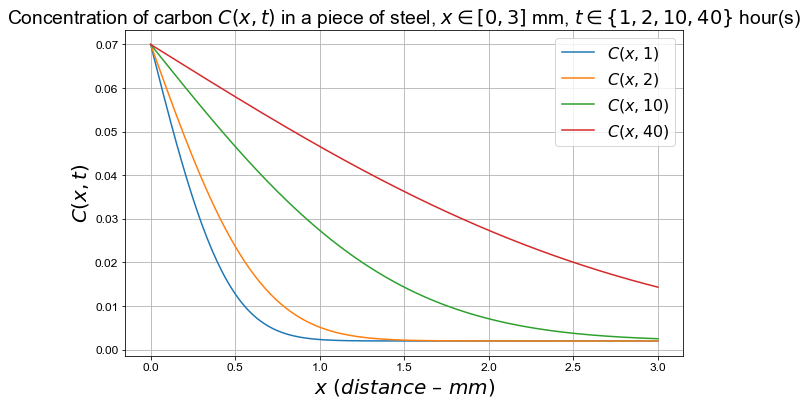

In [60]:
# plot C(x, t) versus x for each specified value of t
# and overlay the four curves (corresponding to four
# values of t) in one figure

pylab.plot(data['x'], data['carbon_1'])
pylab.plot(data['x'], data['carbon_2'])
pylab.plot(data['x'], data['carbon_10'])
pylab.plot(data['x'], data['carbon_40'])

pylab.title('Concentration of carbon $C(x,t)$ in a piece of steel, $x \in [0, 3]$ mm, $t \in \{1, 2, 10, 40\}$ hour(s)')
pylab.xlabel('$x\ (distance\ \endash\ mm)$')
pylab.ylabel('$C(x,t)$')
pylab.grid()

pylab.legend(('$C(x,1)$',
              '$C(x,2)$',
              '$C(x,10)$',
              '$C(x,40)$'))

The overlaid graphs above show (rather intuitively) that at this temperature the carbon concentration of the steal increases at further depths as time increases but with diminishing returns. That is to say, at this temperature the carbon penetrates the steel over time.